In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load the dataset from hugging face
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#clean the data for date
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
    

In [11]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [12]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

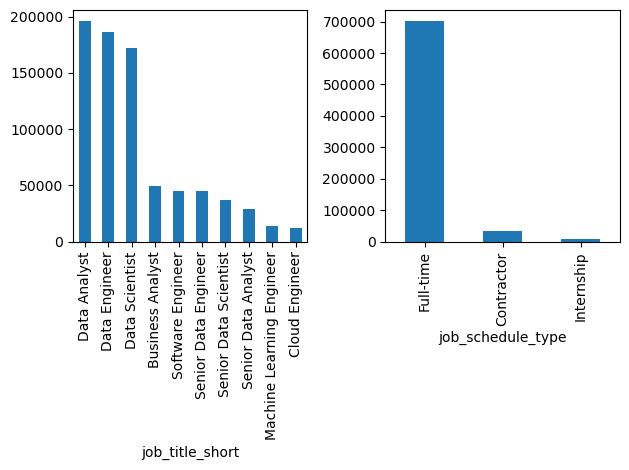

In [18]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

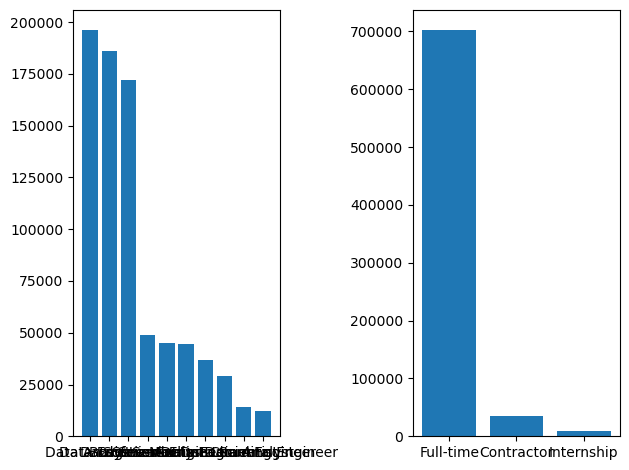

In [23]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

In [25]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = skills_count.reset_index(name='skills_count') 
df_skills_count.sort_values(by='skills_count', ascending=False, inplace=True)


In [26]:
job_titles = ['Data Scientist','Data Analyst','Data Engineer']

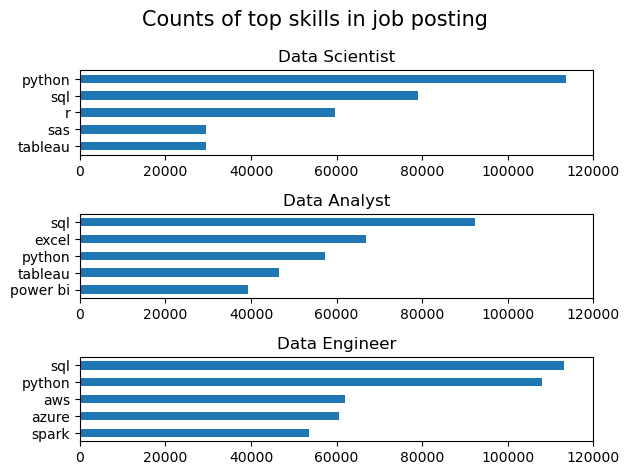

In [44]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skills_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)



fig.suptitle("Counts of top skills in job posting", fontsize=15)
fig.tight_layout()
